In [1]:
!pip3 install -U ucimlrepo 

In [39]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset from scikit-learn
wine_data = load_wine()

# Extract features (X) and targets (y)
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='target')

# Print metadata
print(wine_data.DESCR)

# Print variable information
print(X.info())

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [40]:
# Combine features and targets into a single DataFrame
wine_df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [56]:
#Create df for figures to average scores for each variable by class
class_averages = wine_df.groupby('target').mean()
class_averages.reset_index(inplace=True)
# Define a mapping of current values to new values
value_mapping = {0: 'Cultivar 1', 1: 'Cultivar 2', 2: 'Cultivar 3'}

# Replace the values in the 'target' column using the mapping
class_averages['target'] = class_averages['target'].map(value_mapping)
class_averages

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,Cultivar 1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,Cultivar 2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,Cultivar 3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


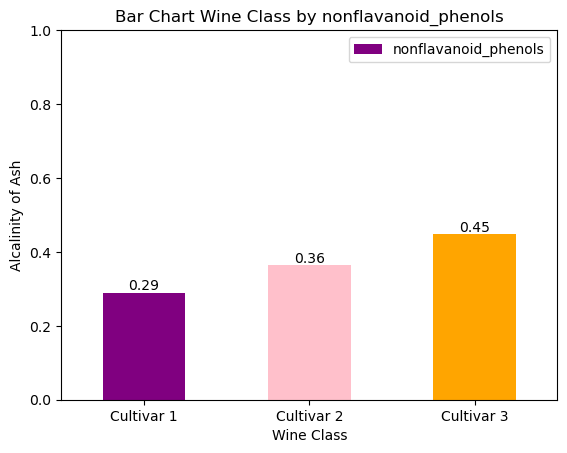

In [57]:
#Descriptive figure for Class by Alcalinity of Ash
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(x='target', y='nonflavanoid_phenols', kind='bar', color=colors)
# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Alcalinity of Ash')
plt.title('Bar Chart Wine Class by nonflavanoid_phenols')
plt.ylim(0,1)
plt.xticks(rotation=0)
#Add labels
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 2)}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Show the plot
plt.show()

In [42]:
# Print out the column names in the DataFrame
print(X.columns)


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


Analyses 
Descriptive statistics will be run on the data to visualize the contents and assess the relationship between wine features and the class they belong to. This will each be accompanied by a figure.



Nonflavanoid_phenols and the class they belong to

In [44]:
# Copy of the nonflavanoid_phenols_df DataFrame
nonflavanoid_phenols_with_class_df = nonflavanoid_phenols_df.copy()

# Add the 'class' column to the DataFrame
nonflavanoid_phenols_with_class_df['target'] = y

# Display the DataFrame
print(nonflavanoid_phenols_with_class_df.head())


   nonflavanoid_phenols  target
0                  0.28       0
1                  0.26       0
2                  0.30       0
3                  0.24       0
4                  0.39       0


AttributeError: 'Wedge' object has no attribute 'get_height'

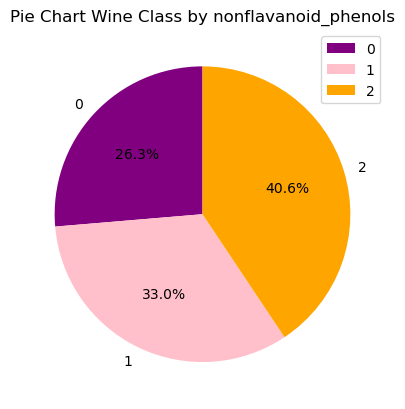

In [58]:
# Descriptive figure for Class by Alcalinity of Ash (Pie Chart)
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(y='nonflavanoid_phenols', kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)

# Add labels and title
plt.ylabel('')  # Remove y-axis label
plt.title('Pie Chart Wine Class by nonflavanoid_phenols')

# Add percentage labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


In [10]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
X_nonflavanoid_phenols = nonflavanoid_phenols_df.copy()
y_nonflavanoid_phenols = nonflavanoid_phenols_with_class_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nonflavanoid_phenols, y_nonflavanoid_phenols, test_size=0.2, random_state=42)

# Define LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(y_train.unique()),  # Number of classes
    'metric': 'multi_logloss',
    'early_stopping_round': 10  # Early stopping round
}

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)  # Set reference to training data for early stopping

# Train the LightGBM model
num_round = 1000  # Set a large number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_class = [int(pred.argmax()) for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 2
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

Proanthocyanins and the class they belong to

In [11]:
# Create a DataFrame for Proanthocyanins and the class they belong to
proanthocyanins_df = X[['proanthocyanins']].copy()
proanthocyanins_df['class'] = y

# Display the DataFrame
print(proanthocyanins_df.head())


   proanthocyanins  class
0             2.29      0
1             1.28      0
2             2.81      0
3             2.18      0
4             1.82      0


In [52]:
# Count the occurrences of each class
class_counts_proanthocyanins = proanthocyanins_df['class'].value_counts()

# Plot the bar graph with annotations
plt.figure(figsize=(8, 6))
bars = class_counts_proanthocyanins.plot(kind='bar', color= purple, pink, yellow)
plt.title('Counts of Classes for Proanthocyanins')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add annotations
for i, count in enumerate(class_counts_proanthocyanins):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()


SyntaxError: positional argument follows keyword argument (471651465.py, line 6)

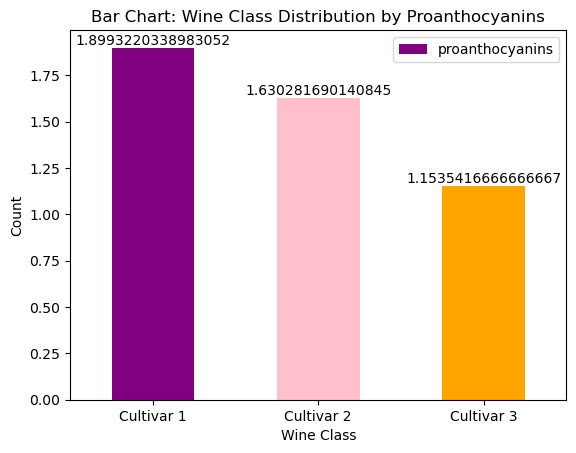

In [64]:
# Descriptive figure for Class by Proanthocyanins
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(x='target', y='proanthocyanins', kind='bar', color=colors)
# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Bar Chart: Wine Class Distribution by Proanthocyanins')
plt.xticks(rotation=0)
# Add annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


Color Intensity and the class they belong to


In [14]:
# DataFrame for Color intensity and the class they belong to
color_intensity_df = X[['color_intensity']].copy()
color_intensity_df['class'] = y

# Display the DataFrame
print(color_intensity_df.head())


   color_intensity  class
0             5.64      0
1             4.38      0
2             5.68      0
3             7.80      0
4             4.32      0


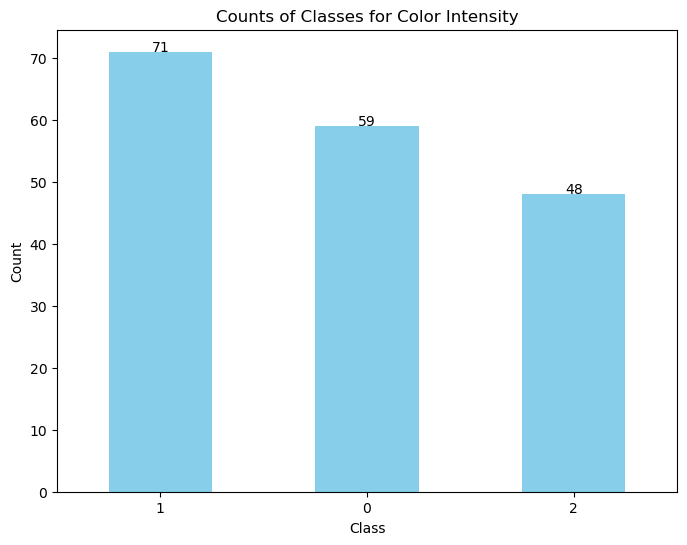

In [15]:
# Count the occurrences of each class
class_counts_color_intensity = color_intensity_df['class'].value_counts()

# Plot the bar graph with annotations
plt.figure(figsize=(8, 6))
bars = class_counts_color_intensity.plot(kind='bar', color='skyblue')
plt.title('Counts of Classes for Color Intensity')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add annotations
for i, count in enumerate(class_counts_color_intensity):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()


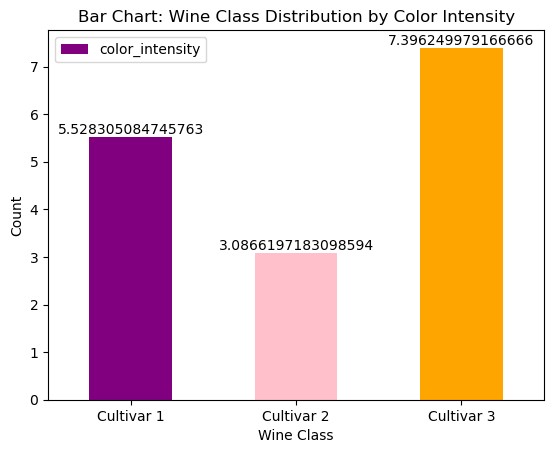

In [69]:
# Descriptive figure for Class by Proanthocyanins
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(x='target', y='color_intensity', kind='bar', color=colors)
# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Bar Chart: Wine Class Distribution by Color Intensity')
plt.xticks(rotation=0)
# Add annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

Lightgbm and hyperparameters

In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(set(y)),  # Number of classes
    'metric': 'multi_logloss'
}

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Train the LightGBM model
num_round = 1000  # Set a large number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_class = [int(pred.argmax()) for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [20],
    'max_depth': [3],
    'learning_rate': [0.05],
}

# Define LightGBM classifier
lgb_clf = lgb.LGBMClassifier(objective='multiclass', num_class=len(set(y)))

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by grid search:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 13
[LightGBM] [Info] Start training from score -1.142097
[LightGBM] [Info] Start training from score -0.905709
[LightGBM] [Info] Start training from score -1.285198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [19]:
# Define the final parameters based on grid search results
final_params = {
    'objective': 'multiclass',
    'num_class': len(set(y)),  # Number of classes
    'metric': 'multi_logloss',
    'num_leaves': 20,  # Selected optimal value
    'max_depth': 3,     # Selected optimal value
    'learning_rate': 0.05  # Selected optimal value
}

# Create a LightGBM dataset for training
train_data_final = lgb.Dataset(X_train, label=y_train)

# Train the final LightGBM model with the selected parameters
final_model = lgb.train(final_params, train_data_final, num_boost_round=1000)

# Make predictions on the test set
y_pred_final = final_model.predict(X_test)
y_pred_class_final = [int(pred.argmax()) for pred in y_pred_final]

# Evaluate the final model
accuracy_final = accuracy_score(y_test, y_pred_class_final)
print("Accuracy of the final model:", accuracy_final)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [20]:
# Get feature importances
feature_importance = final_model.feature_importance()

# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Sort the dictionary by importance (descending order)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")


Feature Importances:
proline: 625
flavanoids: 518
color_intensity: 457
alcohol: 316
hue: 234
magnesium: 219
malic_acid: 167
od280/od315_of_diluted_wines: 156
alcalinity_of_ash: 135
proanthocyanins: 131
total_phenols: 127
ash: 68
nonflavanoid_phenols: 63


In [31]:
import numpy as np

# Initialize a list to store feature importances for each run
all_feature_importances = []

# Repeat the process for multiple runs
num_runs = 5  # You can adjust the number of runs as needed

for _ in range(num_runs):
    # Train your model and get feature importances for each run
    # Assuming you have your model training process here and you get feature_importance_dict for each run
    
    # Append feature importances for this run to the list
    all_feature_importances.append(feature_importance_dict)

# Calculate average feature importances
average_importances = {}
for feature in X.columns:
    # Compute the mean importance for each feature across all runs
    feature_importances = [importance[feature] for importance in all_feature_importances]
    average_importance = np.mean(feature_importances)
    average_importances[feature] = average_importance

# Calculate the total sum of feature importances
total_importance = sum(average_importances.values())

# Calculate the percentage of importance for each feature
percentage_importances = {feature: (importance / total_importance) * 100 for feature, importance in average_importances.items()}

# Sort the dictionary by percentage importance (descending order)
sorted_percentage_importances = dict(sorted(percentage_importances.items(), key=lambda item: item[1], reverse=True))

# Print percentage feature importances
print("Percentage Feature Importances:")
for feature, importance in sorted_percentage_importances.items():
    print(f"{feature}: {importance:.2f}%")



Percentage Feature Importances:
proline: 19.43%
flavanoids: 16.11%
color_intensity: 14.21%
alcohol: 9.83%
hue: 7.28%
magnesium: 6.81%
malic_acid: 5.19%
od280/od315_of_diluted_wines: 4.85%
alcalinity_of_ash: 4.20%
proanthocyanins: 4.07%
total_phenols: 3.95%
ash: 2.11%
nonflavanoid_phenols: 1.96%


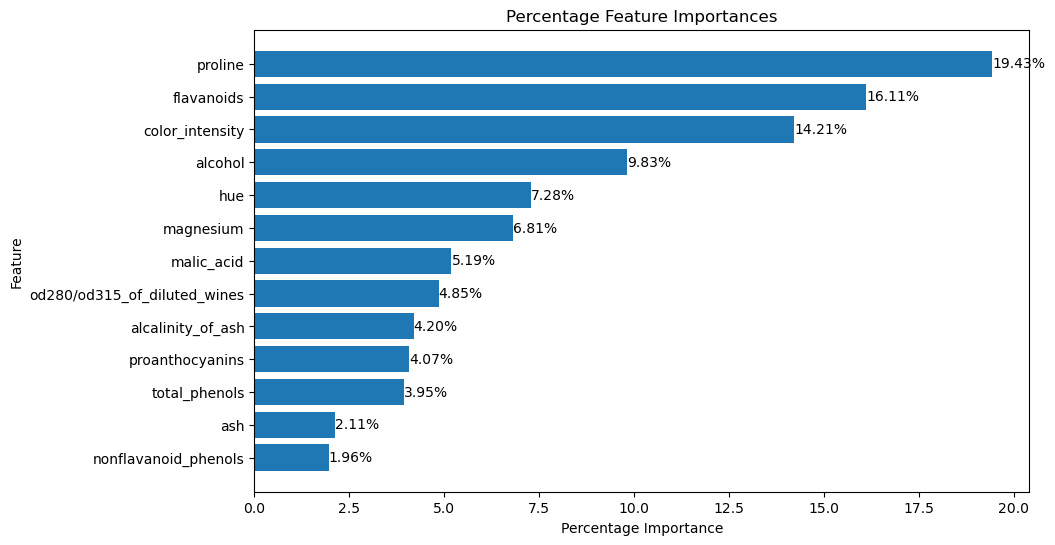

In [33]:
import matplotlib.pyplot as plt

# Plot bar graph for percentage feature importances with annotations
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_percentage_importances)), list(sorted_percentage_importances.values()), align='center')
plt.yticks(range(len(sorted_percentage_importances)), list(sorted_percentage_importances.keys()))
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')
plt.title('Percentage Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top

# Annotate each bar with its corresponding percentage
for bar, importance in zip(bars, sorted_percentage_importances.values()):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.2f}%', va='center')

plt.show()



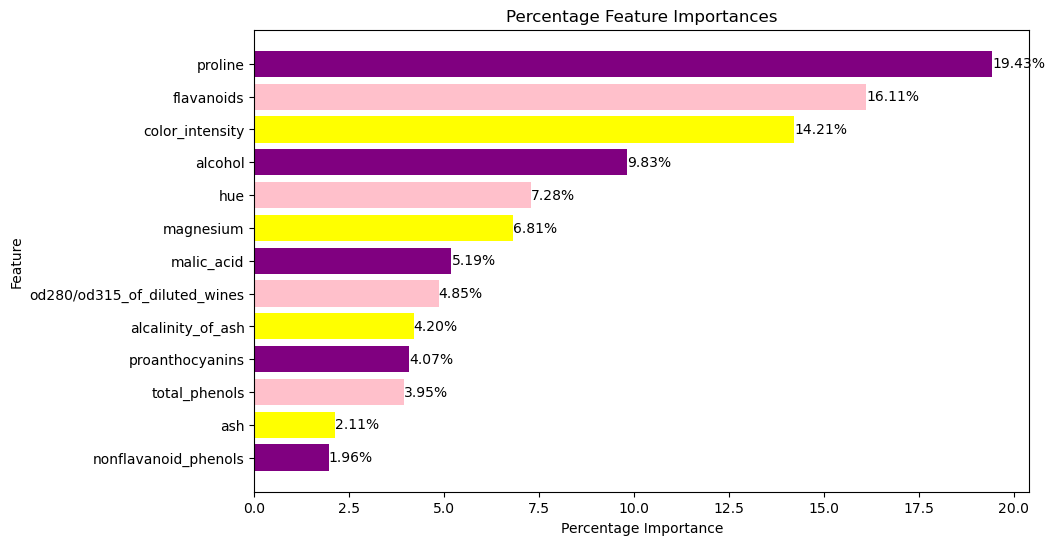

In [70]:
import matplotlib.pyplot as plt

# Define the colors
colors = ['purple', 'pink', 'yellow']

# Plot bar graph for percentage feature importances with annotations
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_percentage_importances)), list(sorted_percentage_importances.values()), align='center', color=colors)
plt.yticks(range(len(sorted_percentage_importances)), list(sorted_percentage_importances.keys()))
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')
plt.title('Percentage Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top

# Annotate each bar with its corresponding percentage
for bar, importance in zip(bars, sorted_percentage_importances.values()):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.2f}%', va='center')

plt.show()


Analysis

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


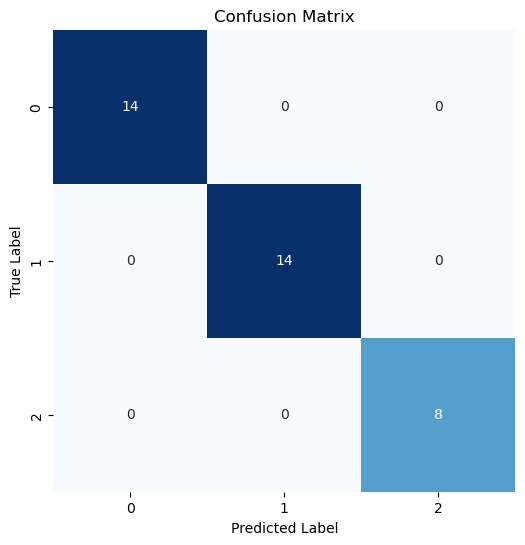

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set using the final model
y_pred = final_model.predict(X_test)
y_pred_class = [int(pred.argmax()) for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178


Confusion Matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


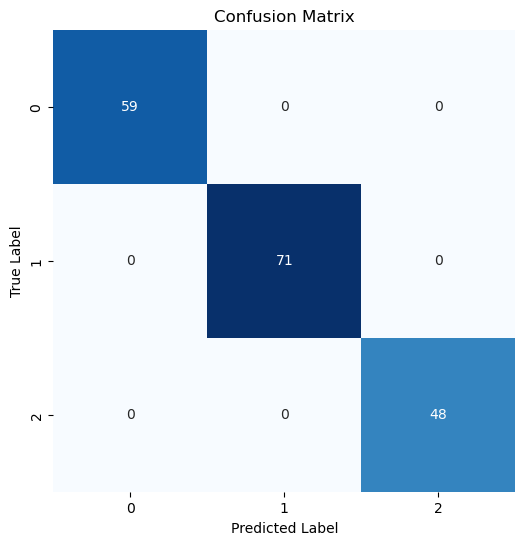

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the full dataset using the final model
y_pred = final_model.predict(X)
y_pred_class = [int(pred.argmax()) for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_class)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y, y_pred_class))

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_class)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
